# Data exploration of cardiovascular disease dataset

## INTRODUCTION
Data exploration, is a phase in a data science project that primarily aims to understand the characteristics and patterns of a data set before building and training models.

For this work the [cardiovascular disease dataset is an open-source dataset found on Kaggle](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset). The data consists of 70,000 patient records (34,979 presenting with cardiovascular disease and 35,021 not presenting with cardiovascular disease). All of the dataset values were collected at the moment of medical examination.

> **Links for more information about the dataset:**
> - https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset
> - https://github.com/caravanuden/cardio?tab=readme-ov-file

### Description of attributes
| coname | description |
| ------- | ----------- |
| id | id number |
| age_days | age in days |
| age_year | age in years |
| gender | gender (1 = women, 2 = men) |
| height | height in cm |
| weight | weight in kg |
| ap_hi | systolic blood pressure |
| ap_lo | diastolic blood pressure |
| cholesterol | cholesterol (1 = normal, 2 = above normal, 3 = well above normal) |
| gluc | glucose level (1 = normal, 2 = above normal, 3 = well above normal) |
| smoke | whether patient smokes or not (0 = no, 1 = yes) |
| alco | whether patient drinks alcohol or not (0 = no, 1 = yes) |
| active | binary feature (0 = passive life, 1 = active life) |
| cardio | Target variable, whether patient has cardiovascular disease or not (0 = no, 1 = yes) |


In [25]:
# LIBRARIES IMPORT
library(ggplot2) # Visualization
library(ggpubr) # Visualization plot arrangement

# -------------------------------
# DATA LOADING

data <- read.csv("../data/cardiovascular_disease.csv",
    # We specify the column classes so that R knows how to interpret the data
    colClasses = c("integer", "integer", "numeric", "factor", "integer", "numeric", "integer", "integer", "factor", "factor", "factor", "factor", "factor", "factor"),
    # We also specify the row names so that we can access the data by the patient ID
    row.names=1
)

## DATA STRUCTURE ANALISYS

In order to identify any possible errors or inconsistencies in the data, which is essential to guarantee the quality of the analysis and subsequent modeling, we review the general structure of the data.

In [26]:
# We verify the dimensions of the data
dim(data)

# Then we begin by print the some rows of the data to understand its structure
head(data)
tail(data)

[1] 70000    13

,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,<int>,<dbl>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
0,18393,50.39178,2,168,62,110,80,1,1,0,0,1,0
1,20228,55.41918,1,156,85,140,90,3,1,0,0,1,1
2,18857,51.66301,1,165,64,130,70,3,1,0,0,0,1
3,17623,48.28219,2,169,82,150,100,1,1,0,0,1,1
4,17474,47.87397,1,156,56,100,60,1,1,0,0,0,0
8,21914,60.03836,1,151,67,120,80,2,2,0,0,0,0


,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,<int>,<dbl>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
99992,21074,57.73699,1,165,80,150,80,1,1,0,0,1,1
99993,19240,52.71233,2,168,76,120,80,1,1,1,0,1,0
99995,22601,61.92055,1,158,126,140,90,2,2,0,0,1,1
99996,19066,52.23562,2,183,105,180,90,3,1,0,1,0,1
99998,22431,61.45479,1,163,72,135,80,1,2,0,0,0,1
99999,20540,56.27397,1,170,72,120,80,2,1,0,0,1,0


In [27]:
# And check if we have any missing data
any(is.na(data))

[1] FALSE

In [28]:
# We obtain data statistics
summary(data)

    age_days        age_year     gender        height          weight      
 Min.   :10798   Min.   :29.58   1:45530   Min.   : 55.0   Min.   : 10.00  
 1st Qu.:17664   1st Qu.:48.39   2:24470   1st Qu.:159.0   1st Qu.: 65.00  
 Median :19703   Median :53.98             Median :165.0   Median : 72.00  
 Mean   :19469   Mean   :53.34             Mean   :164.4   Mean   : 74.21  
 3rd Qu.:21327   3rd Qu.:58.43             3rd Qu.:170.0   3rd Qu.: 82.00  
 Max.   :23713   Max.   :64.97             Max.   :250.0   Max.   :200.00  
     ap_hi             ap_lo          cholesterol gluc      smoke     alco     
 Min.   : -150.0   Min.   :  -70.00   1:52385     1:59479   0:63831   0:66236  
 1st Qu.:  120.0   1st Qu.:   80.00   2: 9549     2: 5190   1: 6169   1: 3764  
 Median :  120.0   Median :   80.00   3: 8066     3: 5331                      
 Mean   :  128.8   Mean   :   96.63                                            
 3rd Qu.:  140.0   3rd Qu.:   90.00                                 

After reviewing the general structure we found no _formatting issues_ at this exploration step and we simplified a bit data. But it is be necesary a deep exploration to identify _logical issues_ that could represent errors in sampling or any other, for that so we summarize our data to identify some.

# Data preparation of cardiovascular disease dataset

This stage addresses quality and formatting issues, such as label correction, removal of outliers, and imputation of missing values.

In [29]:
# We obtain data statistics
summary(data)

    age_days        age_year     gender        height          weight      
 Min.   :10798   Min.   :29.58   1:45530   Min.   : 55.0   Min.   : 10.00  
 1st Qu.:17664   1st Qu.:48.39   2:24470   1st Qu.:159.0   1st Qu.: 65.00  
 Median :19703   Median :53.98             Median :165.0   Median : 72.00  
 Mean   :19469   Mean   :53.34             Mean   :164.4   Mean   : 74.21  
 3rd Qu.:21327   3rd Qu.:58.43             3rd Qu.:170.0   3rd Qu.: 82.00  
 Max.   :23713   Max.   :64.97             Max.   :250.0   Max.   :200.00  
     ap_hi             ap_lo          cholesterol gluc      smoke     alco     
 Min.   : -150.0   Min.   :  -70.00   1:52385     1:59479   0:63831   0:66236  
 1st Qu.:  120.0   1st Qu.:   80.00   2: 9549     2: 5190   1: 6169   1: 3764  
 Median :  120.0   Median :   80.00   3: 8066     3: 5331                      
 Mean   :  128.8   Mean   :   96.63                                            
 3rd Qu.:  140.0   3rd Qu.:   90.00                                 

We found at this step various _logical issues_ like negative blood preasures, inhuman blood preasures, height and weights not correspondant to an adult of 29 which is me minimum age in the dataset so we will need to clean the data for further analysis. Thus and for easy results interpretation and manage of the data renamed variables and created some more.

In [30]:
# We verify if age_days and age_years are strictly the same
cor(data[,c(1,2)])

,age_days,age_year
age_days,1,1
age_year,1,1


We found that `age_days` and `age_year` are as spected, the same, so we decided to conserve just one being `age_year` thus naturally scaling data so that they are on the same scale or range. Avoiding problems with machine learning algorithms that are sensitive to differences in the magnitude of features. This change to the data will be applied later on.

In [31]:
# Delete age_days due to redundancy with age_year
data <- data[-1]

# We add BMI to summarize the information of weight and height
data$BMI <- data$weight / ((data$height / 100)**2) 

# We add pulse to summarize the information of ap_hi and ap_lo
data$pulse <- data$ap_hi - data$ap_lo

# Rename categorical attribute values
levels(data$gender) <- c("Female", "Male")
levels(data$cholesterol) <- c("Normal", "Above-Normal", "Well-Above-Normal")
levels(data$gluc) <- c("Normal", "Above-Normal", "Well-Above-Normal")
levels(data$smoke) <- c("No", "Yes")
levels(data$alco) <- c("No", "Yes")
levels(data$active) <- c("No", "Yes")
levels(data$cardio) <- c("No", "Yes")

# We verify the changes
head(data)

,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,pulse
,<dbl>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>
0,50.39178,Male,168,62,110,80,Normal,Normal,No,No,Yes,No,21.96712,30
1,55.41918,Female,156,85,140,90,Well-Above-Normal,Normal,No,No,Yes,Yes,34.92768,50
2,51.66301,Female,165,64,130,70,Well-Above-Normal,Normal,No,No,No,Yes,23.50781,60
3,48.28219,Male,169,82,150,100,Normal,Normal,No,No,Yes,Yes,28.71048,50
4,47.87397,Female,156,56,100,60,Normal,Normal,No,No,No,No,23.01118,40
8,60.03836,Female,151,67,120,80,Above-Normal,Above-Normal,No,No,No,No,29.38468,40


In [32]:
# We obtain the indexes of the quantitative attributes
quantitative.rows <- c(1,3,4,5,6,13,14)
head(data[, quantitative.rows])

,age_year,height,weight,ap_hi,ap_lo,BMI,pulse
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>
0,50.39178,168,62,110,80,21.96712,30
1,55.41918,156,85,140,90,34.92768,50
2,51.66301,165,64,130,70,23.50781,60
3,48.28219,169,82,150,100,28.71048,50
4,47.87397,156,56,100,60,23.01118,40
8,60.03836,151,67,120,80,29.38468,40


### Statististical exploration

For further cleaning it will be driven by the search of _statistically and logical issues_ that may not represent reallity

In [33]:
# Then again we visualise data statistics summary
summary(data)

# We also check the quantitative rows' standard deviation
lapply(data[, quantitative.rows], sd)

    age_year        gender          height          weight      
 Min.   :29.58   Female:45530   Min.   : 55.0   Min.   : 10.00  
 1st Qu.:48.39   Male  :24470   1st Qu.:159.0   1st Qu.: 65.00  
 Median :53.98                  Median :165.0   Median : 72.00  
 Mean   :53.34                  Mean   :164.4   Mean   : 74.21  
 3rd Qu.:58.43                  3rd Qu.:170.0   3rd Qu.: 82.00  
 Max.   :64.97                  Max.   :250.0   Max.   :200.00  
     ap_hi             ap_lo                     cholesterol   
 Min.   : -150.0   Min.   :  -70.00   Normal           :52385  
 1st Qu.:  120.0   1st Qu.:   80.00   Above-Normal     : 9549  
 Median :  120.0   Median :   80.00   Well-Above-Normal: 8066  
 Mean   :  128.8   Mean   :   96.63                            
 3rd Qu.:  140.0   3rd Qu.:   90.00                            
 Max.   :16020.0   Max.   :11000.00                            
                gluc       smoke        alco       active      cardio     
 Normal           :594

$age_year
[1] 6.759594

$height
[1] 8.210126

$weight
[1] 14.39576

$ap_hi
[1] 154.0114

$ap_lo
[1] 188.4725

$BMI
[1] 6.091511

$pulse
[1] 241.4696

## Correlation search

Here we aim to discover patterns and relationships between variables, which can provide clues about possible correlations or dependencies, 

In [34]:
# We observe if there is correlation between the variables
cor(data[, quantitative.rows],method = "p")
cor(data[, quantitative.rows],method = "s")

,age_year,height,weight,ap_hi,ap_lo,BMI,pulse
age_year,1.0000000000,-0.081515349,0.05368404,0.020764319,0.017647434,0.08551237,-0.0005305605
height,-0.0815153492,1.000000000,0.29096783,0.005487764,0.006150467,-0.29064164,-0.0013004359
weight,0.0536840431,0.290967835,1.00000000,0.030702209,0.043709773,0.76200859,-0.0145343354
ap_hi,0.0207643193,0.005487764,0.03070221,1.000000000,0.016085513,0.02485228,0.6252535236
ap_lo,0.0176474340,0.006150467,0.04370977,0.016085513,1.000000000,0.03534484,-0.7702632058
BMI,0.0855123746,-0.290641636,0.76200859,0.024852282,0.035344844,1.00000000,-0.0117364526
pulse,-0.0005305605,-0.001300436,-0.01453434,0.625253524,-0.770263206,-0.01173645,1.0000000000


,age_year,height,weight,ap_hi,ap_lo,BMI,pulse
age_year,1.00000000,-0.0822922601,0.06155894,0.21908653,0.15669953,0.1076095,0.1708841354
height,-0.08229226,1.0000000000,0.31356927,0.01938127,0.03053381,-0.1823897,0.0005956214
weight,0.06155894,0.3135692699,1.00000000,0.27774886,0.25441979,0.8482713,0.1707815822
ap_hi,0.21908653,0.0193812657,0.27774886,1.00000000,0.73543611,0.2811021,0.7414327101
ap_lo,0.15669953,0.0305338058,0.25441979,0.73543611,1.00000000,0.2506089,0.2049110278
BMI,0.10760954,-0.1823896883,0.84827127,0.28110211,0.25060887,1.0000000,0.1792273681
pulse,0.17088414,0.0005956214,0.17078158,0.74143271,0.20491103,0.1792274,1.0000000000


In [35]:
# Pairwise comparison visualization
# par(bg="white") # for white backgrond in VS Code plot print
# pairs(data[,quantitative.rows])

As we can see, there are many outliers that prevent the visualization of a clear correlation.

### Data distribution differences across cardiovascular condition

In order to find those attributes in which the outliers are much more predominant we tried to visualize the distributions for our data

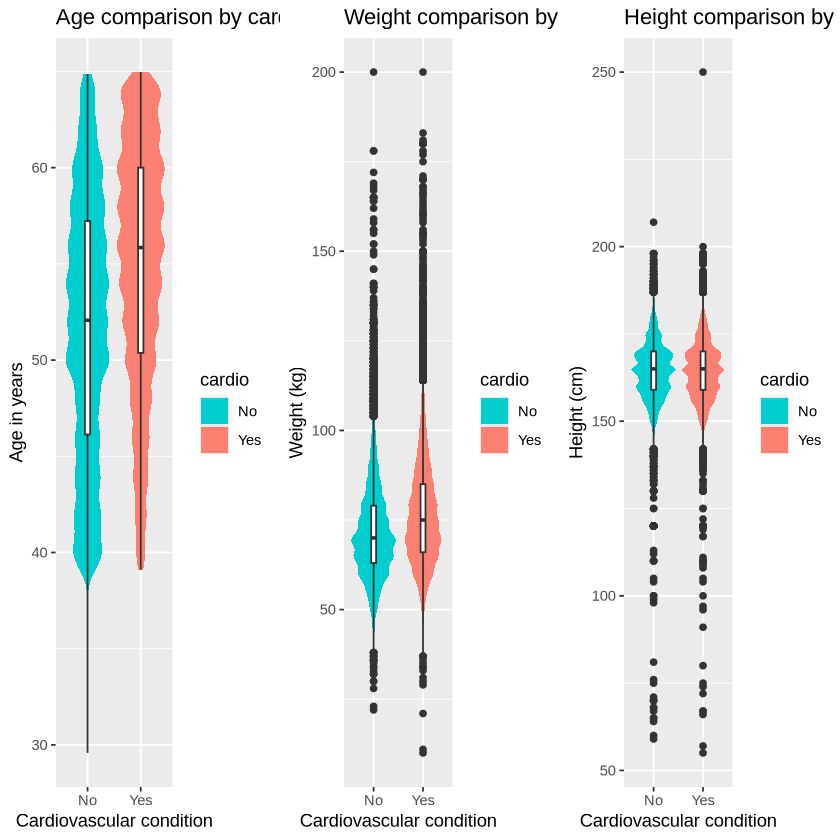

In [36]:
# Age
p1 <- ggplot(data, aes(x=cardio, y=age_year, fill=cardio)) +
 geom_violin(color=NA) +
 scale_fill_manual(values = c("No" = "cyan3", "Yes" = "salmon")) +
 geom_boxplot(fill="white", width=0.1) +
 labs(title = "Age comparison by cardiovascular condition", x = "Cardiovascular condition", y = "Age in years")
 
# Weight
p2 <- ggplot(data, aes(x=cardio, y=weight, fill=cardio)) + 
 geom_violin(color=NA) +
 scale_fill_manual(values = c("No" = "cyan3", "Yes" = "salmon")) +
 geom_boxplot(fill="white", width=0.1) +
 labs(title = "Weight comparison by cardiovascular condition", x = "Cardiovascular condition", y = "Weight (kg)")

# Height
p3 <- ggplot(data, aes(x=cardio, y=height, fill=cardio)) + 
 geom_violin(color=NA) +
 scale_fill_manual(values = c("No" = "cyan3", "Yes" = "salmon")) +
 geom_boxplot(fill="white", width=0.1) +
 labs(title = "Height comparison by cardiovascular condition", x = "Cardiovascular condition", y = "Height (cm)")

ggarrange(p1, p2, p3, nrow=1, ncol=3)

In [37]:
# BMI
p4 <- ggplot(data, aes(x=cardio, y=BMI, fill=cardio)) +
 geom_violin(color=NA) +
 scale_fill_manual(values = c("No" = "cyan3", "Yes" = "salmon")) +
 geom_boxplot(fill="white", width=0.1) +
 labs(title = "BMI comparison by cardiovascular condition", x = "Cardiovascular condition", y = "BMI")

# Pulse
p5 <- ggplot(data, aes(x=cardio, y=pulse, fill=cardio)) +
 geom_violin(color=NA) +
 scale_fill_manual(values = c("No" = "cyan3", "Yes" = "salmon")) +
 geom_boxplot(fill="white", width=0.1) +
 labs(title = "Pulse comparison by cardiovascular condition", x = "Cardiovascular condition", y = "Pulse")

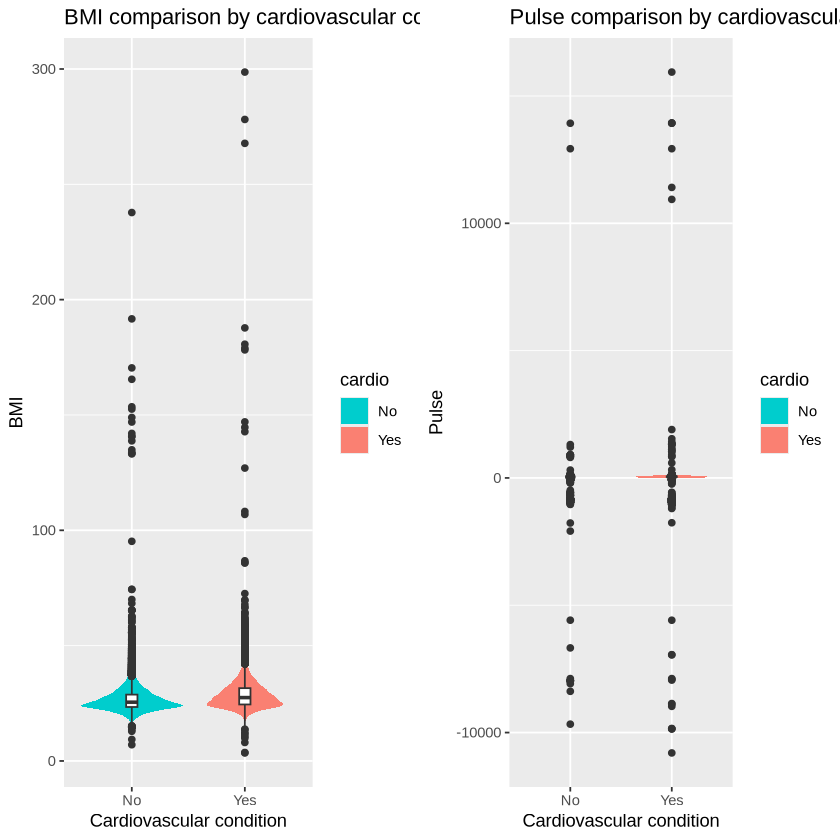

In [38]:
ggarrange(p4, p5, nrow=1, ncol=2)

To begin with we identify that the most noisy are those recapitulating more than one attribute (_i.e._ pulse and BMI) thus we expect that if in the same way for finding a upper and lower levels for otuliers detections reflect a medical limit for the attribute it represents we can concider it as a propper cutoff. 

In [39]:
# OUTLIERS DETECTION FOR BMI

# Cardiovasular disease quantiles
cardio.yes.quantile <- quantile(data[data$cardio == "Yes", "BMI"])
cardio.no.quantile <- quantile(data[data$cardio == "No", "BMI"])

# Interquartile range
cardio.yes.iq.range <- as.numeric(cardio.yes.quantile["75%"] - cardio.yes.quantile["25%"])
cardio.no.iq.range <- as.numeric(cardio.no.quantile["75%"] - cardio.no.quantile["25%"])

# Upper and lower limits for outliers in both groups
cardio.yes.upper.limit <- as.numeric(cardio.yes.quantile["75%"] + 1.5*cardio.yes.iq.range)
cardio.yes.lower.limit <- as.numeric(cardio.yes.quantile["25%"] - 1.5*cardio.yes.iq.range)
cardio.no.upper.limit <- as.numeric(cardio.no.quantile["75%"] + 1.5*cardio.no.iq.range)
cardio.no.lower.limit <- as.numeric(cardio.no.quantile["25%"] - 1.5*cardio.no.iq.range)

# Define limits for non-outliers in BMI for both groups
upper.limit <- max(cardio.yes.upper.limit, cardio.no.upper.limit)
lower.limit <- min(cardio.yes.lower.limit, cardio.no.lower.limit)

print("Final limits for outliers") # Limits for outliers
print(paste("Upper limit:", upper.limit))
print(paste("Lower limit:", lower.limit))

# New variable of non-outliers indexes in BMI
summary(data.bmi.clean <- (data$BMI >= lower.limit & data$BMI <= upper.limit))

[1] "Final limits for outliers"
[1] "Upper limit: 42.1541950113379"
[1] "Lower limit: 13.891156462585"


   Mode   FALSE    TRUE 
logical    1150   68850 

For reference we compared our results to [Overweight & Obesity Statistics from NIH](https://www.niddk.nih.gov/health-information/health-statistics/overweight-obesity). The table below shows BMI ranges for overweight and obesity in adults 20 and older.

| BMI          | Classification                     |
| ------------ | ---------------------------------- |
| 18.5 to 24.9 | Normal, or healthy, weight         |
| 25 to 29.9   | Overweight                         |
| 30+          | Obesity (including severe obesity) |
| 40+          | Severe obesity                     |


We observe that those limits for outliers resemble real world data and we decided to see how they would work as cutoffs.

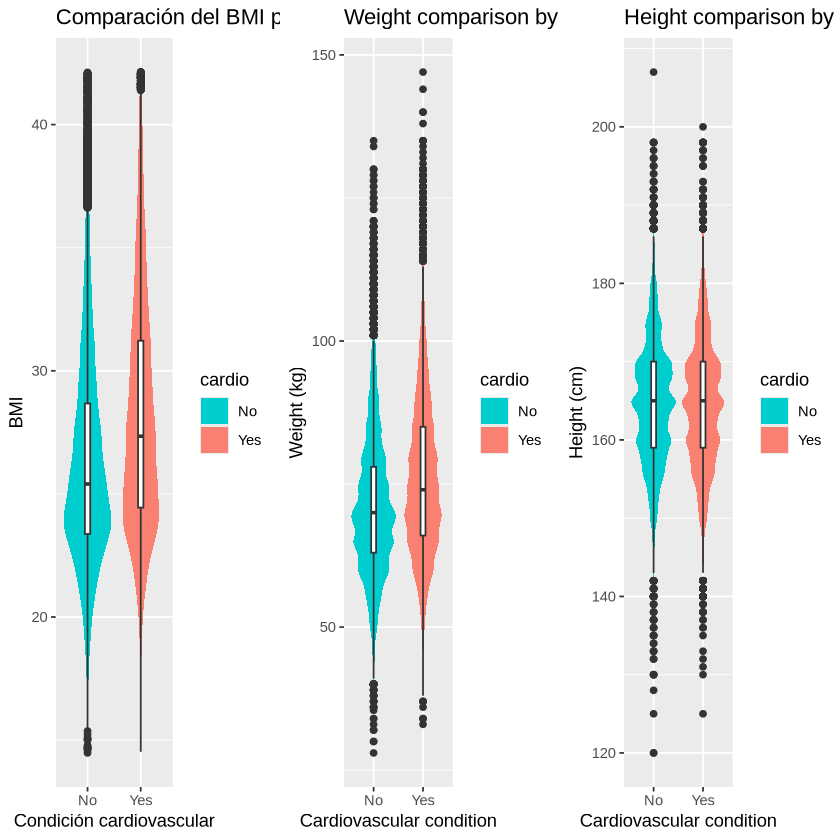

In [40]:
p1 <- ggplot(data[data.bmi.clean,], aes(x=cardio, y=BMI, fill=cardio)) +
 geom_violin(color=NA) +
 scale_fill_manual(values = c("No" = "cyan3", "Yes" = "salmon")) +
 geom_boxplot(fill="white", width=0.1) +
 labs(title = "Comparación del BMI por condición cardiovascular", x = "Condición cardiovascular", y = "BMI")

# Weight
p2 <- ggplot(data[data.bmi.clean,], aes(x=cardio, y=weight, fill=cardio)) + 
 geom_violin(color=NA) +
 scale_fill_manual(values = c("No" = "cyan3", "Yes" = "salmon")) +
 geom_boxplot(fill="white", width=0.1) +
 labs(title = "Weight comparison by cardiovascular condition", x = "Cardiovascular condition", y = "Weight (kg)")

# Height
p3 <- ggplot(data[data.bmi.clean,], aes(x=cardio, y=height, fill=cardio)) + 
 geom_violin(color=NA) +
 scale_fill_manual(values = c("No" = "cyan3", "Yes" = "salmon")) +
 geom_boxplot(fill="white", width=0.1) +
 labs(title = "Height comparison by cardiovascular condition", x = "Cardiovascular condition", y = "Height (cm)")

ggarrange(p1, p2, p3, nrow=1, ncol=3)

In [41]:
summary(data[data.bmi.clean, quantitative.rows])

    age_year         height          weight           ap_hi        
 Min.   :29.58   Min.   :120.0   Min.   : 28.00   Min.   : -150.0  
 1st Qu.:48.38   1st Qu.:159.0   1st Qu.: 65.00   1st Qu.:  120.0  
 Median :53.98   Median :165.0   Median : 72.00   Median :  120.0  
 Mean   :53.33   Mean   :164.5   Mean   : 73.53   Mean   :  128.7  
 3rd Qu.:58.42   3rd Qu.:170.0   3rd Qu.: 81.00   3rd Qu.:  140.0  
 Max.   :64.97   Max.   :207.0   Max.   :147.00   Max.   :16020.0  
     ap_lo               BMI            pulse          
 Min.   :  -70.00   Min.   :14.48   Min.   :-10800.00  
 1st Qu.:   80.00   1st Qu.:23.88   1st Qu.:    40.00  
 Median :   80.00   Median :26.27   Median :    40.00  
 Mean   :   96.22   Mean   :27.19   Mean   :    32.46  
 3rd Qu.:   90.00   3rd Qu.:30.04   3rd Qu.:    50.00  
 Max.   :11000.00   Max.   :42.13   Max.   : 15940.00  

In [42]:
summary(data.bmi.clean <- data.bmi.clean & data$weight > 40)

   Mode   FALSE    TRUE 
logical    1232   68768 

Atthispoitwealsoaddedafilterforpeoplethat

We still see data that needs refinement but we also see that some noisy data has gone with a similar aproach and assuptions we tried to find cleaner data for the pulse attribute

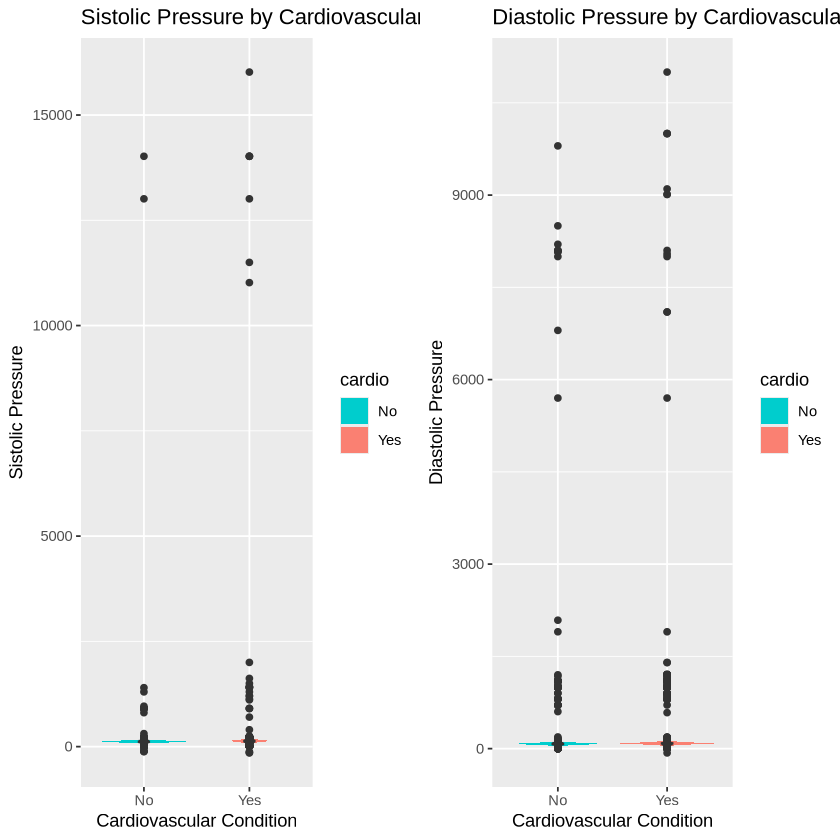

In [43]:
p1 <- ggplot(data, aes(x=cardio, y=ap_hi, fill=cardio)) +
 geom_violin(color=NA) +
 scale_fill_manual(values = c("No" = "cyan3", "Yes" = "salmon")) +
 geom_boxplot(fill="white", width=0.1) +
 labs(title = "Sistolic Pressure by Cardiovascular Condition", x = "Cardiovascular Condition", y = "Sistolic Pressure")

p2 <- ggplot(data, aes(x=cardio, y=ap_lo, fill=cardio)) +
 geom_violin(color=NA) +
 scale_fill_manual(values = c("No" = "cyan3", "Yes" = "salmon")) +
 geom_boxplot(fill="white", width=0.1) +
 labs(title = "Diastolic Pressure by Cardiovascular Condition", x = "Cardiovascular Condition", y = "Diastolic Pressure")

ggarrange(p1, p2, nrow=1, ncol=2)

In this dataset one of the most clearest anomalies found are those in the pressures. These pressures should be positive numbers that are typically between 120 (systolic pressure) and 80 (diastolic pressure). In turn, the systolic pressure should be higher than the diastolic pressure.

For reference we compared our results to [Blood pressure levels from NIH](https://www.nhlbi.nih.gov/health/high-blood-pressure)

| Blood Pressure Category | Systolic Pressure (mm Hg) | Diastolic Pressure (mm Hg) |
| ----------------------- | ------------------------- | -------------------------- |
| Normal | Less than 120 systolic pressure | Less than 80 diastolic pressure |
| Elevated | 120 to 129 systolic pressure | Less than 80 diastolic pressure |
| High Blood Pressure Stage 1 | 130 to 139 systolic pressure | 80 to 89 diastolic pressure |
| High Blood Pressure Stage 2 | 140 or higher systolic pressure | 90 or higher diastolic pressure |
| Hypertensive Crisis | Higher than 180 systolic pressure | Higher than 120 diastolic pressure |


Thus With this information we decided to retain data that remains within the limists of the medical boundries

In [44]:
# OUTLIERS DETECTION FOR PRESSURES

## CARDIO YES
# Cardiovasular disease quantiles
cardio.yes.ap_hi.quantile <- quantile(data$ap_hi[data$cardio == "Yes"])
cardio.yes.ap_lo.quantile <- quantile(data$ap_lo[data$cardio == "Yes"])
# Interquartile range
cardio.yes.ap_hi.iq.range <- as.numeric(cardio.yes.ap_hi.quantile["75%"] - cardio.yes.ap_hi.quantile["25%"])
cardio.yes.ap_lo.iq.range <- as.numeric(cardio.yes.ap_lo.quantile["75%"] - cardio.yes.ap_lo.quantile["25%"])
# Upper and lower limits for outliers
cardio.yes.ap_hi.upper.limit <- as.numeric(cardio.yes.ap_hi.quantile["75%"] + 1.5*cardio.yes.ap_hi.iq.range)
cardio.yes.ap_hi.lower.limit <- as.numeric(cardio.yes.ap_hi.quantile["25%"] - 1.5*cardio.yes.ap_hi.iq.range)
cardio.yes.ap_lo.upper.limit <- as.numeric(cardio.yes.ap_lo.quantile["75%"] + 1.5*cardio.yes.ap_lo.iq.range)
cardio.yes.ap_lo.lower.limit <- as.numeric(cardio.yes.ap_lo.quantile["25%"] - 1.5*cardio.yes.ap_lo.iq.range)

## CARDIO NO
# Cardiovasular disease quantiles
cardio.no.ap_hi.quantile <- quantile(data$ap_hi[data$cardio == "No"])
cardio.no.ap_lo.quantile <- quantile(data$ap_lo[data$cardio == "No"])
# Interquartile range
cardio.no.ap_hi.iq.range <- as.numeric(cardio.no.ap_hi.quantile["75%"] - cardio.no.ap_hi.quantile["25%"])
cardio.no.ap_lo.iq.range <- as.numeric(cardio.no.ap_lo.quantile["75%"] - cardio.no.ap_lo.quantile["25%"])
# Upper and lower limits for outliers
cardio.no.ap_hi.upper.limit <- as.numeric(cardio.no.ap_hi.quantile["75%"] + 1.5*cardio.no.ap_hi.iq.range)
cardio.no.ap_hi.lower.limit <- as.numeric(cardio.no.ap_hi.quantile["25%"] - 1.5*cardio.no.ap_hi.iq.range)
cardio.no.ap_lo.upper.limit <- as.numeric(cardio.no.ap_lo.quantile["75%"] + 1.5*cardio.no.ap_lo.iq.range)
cardio.no.ap_lo.lower.limit <- as.numeric(cardio.no.ap_lo.quantile["25%"] - 1.5*cardio.no.ap_lo.iq.range)

# Define limits for non-outliers in BMI for both groups
ap_hi.upper.limit <- max(cardio.yes.ap_hi.upper.limit, cardio.no.ap_hi.upper.limit)
ap_hi.lower.limit <- min(cardio.yes.ap_hi.lower.limit, cardio.no.ap_hi.lower.limit)
ap_lo.upper.limit <- max(cardio.yes.ap_lo.upper.limit, cardio.no.ap_lo.upper.limit)
ap_lo.lower.limit <- min(cardio.yes.ap_lo.lower.limit, cardio.no.ap_lo.lower.limit)

print("Final limits for ap_hi outliers") # Limits for outliers
print(paste("Upper limit:", ap_hi.upper.limit))
print(paste("Lower limit:", ap_hi.lower.limit))

print("Final limits for ap_lo outliers") # Limits for outliers
print(paste("Upper limit:", ap_lo.upper.limit))
print(paste("Lower limit:", ap_lo.lower.limit))

# New variables of non-outliers indexes for each pressure
data.ap_hi.clean <- (data$ap_hi >= ap_hi.lower.limit & data$ap_hi <= ap_hi.upper.limit)
data.ap_lo.clean <- (data$ap_lo >= ap_lo.lower.limit & data$ap_lo <= ap_lo.upper.limit)

# New variable of non-outliers indexes in pressures
summary(data.pressure.clean <- data.ap_hi.clean & data.ap_lo.clean)


[1] "Final limits for ap_hi outliers"
[1] "Upper limit: 170"
[1] "Lower limit: 90"
[1] "Final limits for ap_lo outliers"
[1] "Upper limit: 105"
[1] "Lower limit: 55"


   Mode   FALSE    TRUE 
logical    2783   67217 

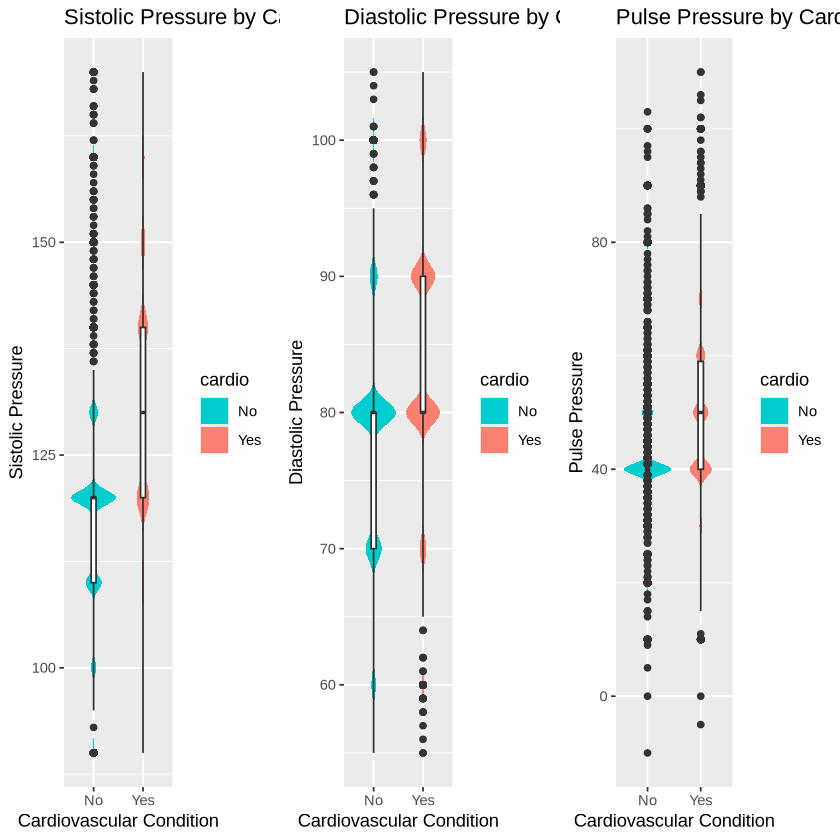

In [45]:
# Sistolic preassure
p1 <- ggplot(data[data.pressure.clean,], aes(x=cardio, y=ap_hi, fill=cardio)) +
 geom_violin(color=NA) +
 scale_fill_manual(values = c("No" = "cyan3", "Yes" = "salmon")) +
 geom_boxplot(fill="white", width=0.1) +
 labs(title = "Sistolic Pressure by Cardiovascular Condition", x = "Cardiovascular Condition", y = "Sistolic Pressure")

# Diastolic preassure
p2 <- ggplot(data[data.pressure.clean, ], aes(x=cardio, y=ap_lo, fill=cardio)) +
 geom_violin(color=NA) +
 scale_fill_manual(values = c("No" = "cyan3", "Yes" = "salmon")) +
 geom_boxplot(fill="white", width=0.1) +
 labs(title = "Diastolic Pressure by Cardiovascular Condition", x = "Cardiovascular Condition", y = "Diastolic Pressure")

# Pulse preassure
p3 <- ggplot(data[data.pressure.clean,], aes(x=cardio, y=pulse, fill=cardio)) +
 geom_violin(color=NA) +
 scale_fill_manual(values = c("No" = "cyan3", "Yes" = "salmon")) +
 geom_boxplot(fill="white", width=0.1) +
 labs(title = "Pulse Pressure by Cardiovascular Condition", x = "Cardiovascular Condition", y = "Pulse Pressure")

ggarrange(p1, p2, p3, nrow=1, ncol=3)

We found that the limits marked for outliers detection still resemble some real world parameters but eve though we think that in order to conserve more extrem data we can relly completetly on medical knowledge, so we tested using arbitrary parameters based on medical literature with a wider approach

For more information:
- [What Is High Blood Pressure?](https://www.nhlbi.nih.gov/health/high-blood-pressure)
- [Physiology, Pulse Pressure](https://www.ncbi.nlm.nih.gov/books/NBK482408/#:~:text=A%20normal%20young%20adult%20at,C%20=%20Delta%20V/Delta%20P)

In [46]:
# New variable of non-outliers indexes in pressures
# Driven by flexible medical knowledge
summary(data.pressure.clean <- (data$ap_hi > 50 & data$ap_hi < 200 & data$ap_lo > 50 & data$ap_lo < 200))

   Mode   FALSE    TRUE 
logical    1450   68550 

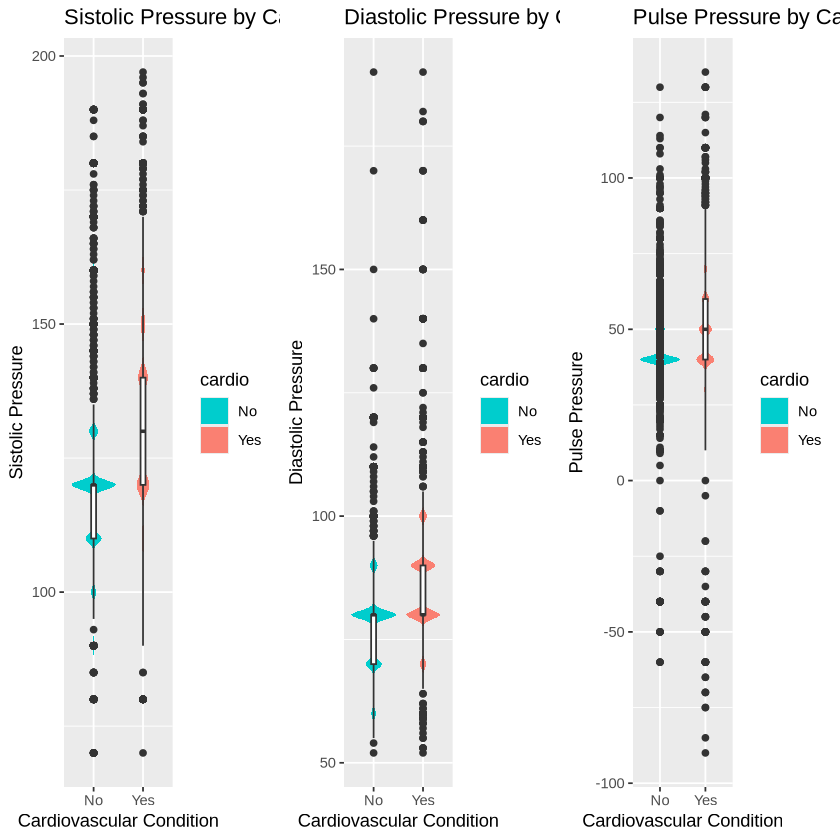

In [47]:
# Sistolic preassure
p1 <- ggplot(data[data.pressure.clean,], aes(x=cardio, y=ap_hi, fill=cardio)) +
 geom_violin(color=NA) +
 scale_fill_manual(values = c("No" = "cyan3", "Yes" = "salmon")) +
 geom_boxplot(fill="white", width=0.1) +
 labs(title = "Sistolic Pressure by Cardiovascular Condition", x = "Cardiovascular Condition", y = "Sistolic Pressure")

# Diastolic preassure
p2 <- ggplot(data[data.pressure.clean, ], aes(x=cardio, y=ap_lo, fill=cardio)) +
 geom_violin(color=NA) +
 scale_fill_manual(values = c("No" = "cyan3", "Yes" = "salmon")) +
 geom_boxplot(fill="white", width=0.1) +
 labs(title = "Diastolic Pressure by Cardiovascular Condition", x = "Cardiovascular Condition", y = "Diastolic Pressure")

# Pulse preassure
p3 <- ggplot(data[data.pressure.clean,], aes(x=cardio, y=pulse, fill=cardio)) +
 geom_violin(color=NA) +
 scale_fill_manual(values = c("No" = "cyan3", "Yes" = "salmon")) +
 geom_boxplot(fill="white", width=0.1) +
 labs(title = "Pulse Pressure by Cardiovascular Condition", x = "Cardiovascular Condition", y = "Pulse Pressure")

ggarrange(p1, p2, p3, nrow=1, ncol=3)

It is also needed to elimitate data with negative, vero or extreme pulse pressures as medical knowledge sugest is an error in sampling.  

In [48]:
summary(data.pressure.clean <- data.pressure.clean & data$pulse >= 10 & data$pulse <= 100)

   Mode   FALSE    TRUE 
logical    1597   68403 

In [49]:
summary(data.clean <- data[data.bmi.clean & data.pressure.clean,])

    age_year        gender          height          weight      
 Min.   :29.58   Female:43558   Min.   :120.0   Min.   : 41.00  
 1st Qu.:48.37   Male  :23682   1st Qu.:159.0   1st Qu.: 65.00  
 Median :53.97                  Median :165.0   Median : 72.00  
 Mean   :53.32                  Mean   :164.5   Mean   : 73.49  
 3rd Qu.:58.41                  3rd Qu.:170.0   3rd Qu.: 81.00  
 Max.   :64.97                  Max.   :207.0   Max.   :147.00  
     ap_hi           ap_lo                   cholesterol   
 Min.   : 80.0   Min.   : 53.00   Normal           :50638  
 1st Qu.:120.0   1st Qu.: 80.00   Above-Normal     : 9032  
 Median :120.0   Median : 80.00   Well-Above-Normal: 7570  
 Mean   :126.3   Mean   : 81.21                            
 3rd Qu.:140.0   3rd Qu.: 90.00                            
 Max.   :197.0   Max.   :182.00                            
                gluc       smoke        alco       active      cardio     
 Normal           :57340   No :61295   No :63668  

Now that we've detected anormal the anormal data that we've found we check how much data we have conserved.

In [50]:
dim(data.clean)

[1] 67240    14

Now we proceed to check the distributions in the qualitative attributes we have

In [ ]:
# Gender
p1 <- ggplot(data.clean, aes(x=cardio, fill=gender)) +
 geom_bar() +
 labs(title = "Male-Female proportion by cardiovascular condition", x = "Cardiovascular condition", y = "Count")
 
# Cholesterol
p2 <- ggplot(data.clean, aes(x=cardio, fill=cholesterol)) +
 geom_bar() +
 scale_fill_manual(values = c("Normal" = "cyan3", "Above-Normal" = "khaki", "Well-Above-Normal" = "salmon")) +
 labs(title = "Cholesterol levels by Cardiovascular Condition", x = "Cardiovascular Condition", y = "Cholesterol level")

# Glucose
p3 <- ggplot(data.clean, aes(x=cardio, fill=gluc)) +
 geom_bar() +
 scale_fill_manual(values = c("Normal" = "cyan3", "Above-Normal" = "khaki", "Well-Above-Normal" = "salmon")) +
 labs(title = "Glucose levels by Cardiovascular Condition", x = "Cardiovascular Condition", y = "Glucose level")

# Smoke
p4 <- ggplot(data.clean, aes(x=cardio, fill=smoke)) +
 geom_bar() +
 scale_fill_manual(values = c("No" = "cyan3", "Yes" = "salmon")) +
 labs(title = "Smokers porportion by Cardiovascular Condition", x = "Cardiovascular Condition", y = "Recount")

# Alcohol
p5 <- ggplot(data.clean, aes(x=cardio, fill=alco)) +
 geom_bar() +
 scale_fill_manual(values = c("No" = "cyan3", "Yes" = "salmon")) +
 labs(title = "Regular alcohol cosmumers porportion by Cardiovascular Condition", x = "Cardiovascular Condition", y = "Recount")

# Physical activity
p6 <- ggplot(data.clean, aes(x=cardio, fill=active)) +
 geom_bar() +
 scale_fill_manual(values = c("No" = "cyan3", "Yes" = "salmon")) +
 labs(title = "Active livestyle porportion by Cardiovascular Condition", x = "Cardiovascular Condition", y = "Recount")

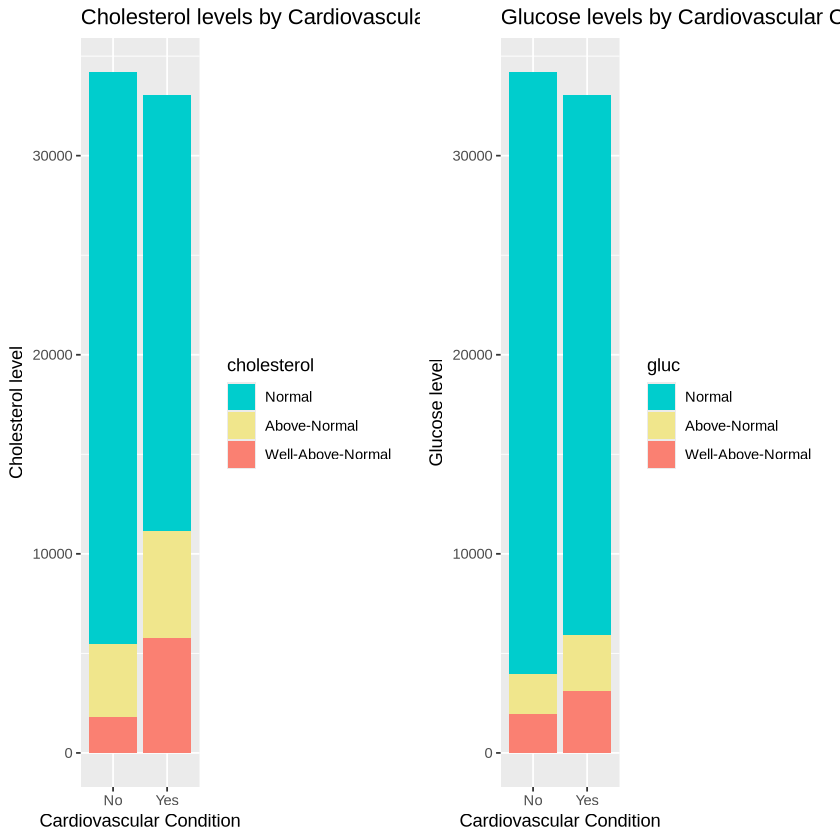

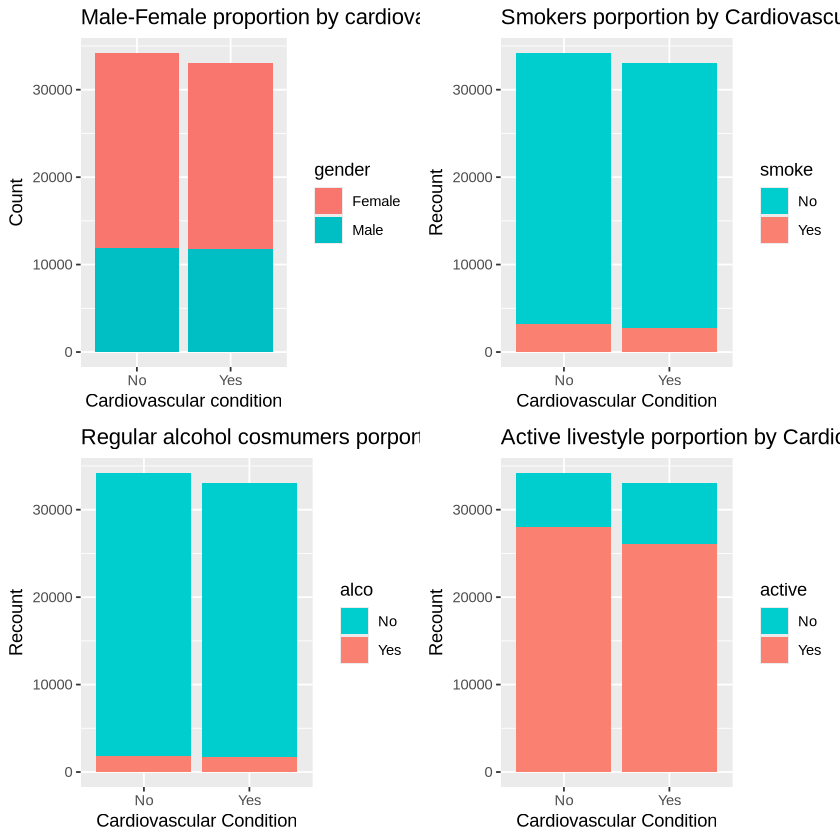

In [53]:
print(ggarrange(p2, p3, nrow=1, ncol=2))
print(ggarrange(p1, p4, p5, p6, nrow=2, ncol=2))

In [55]:
# We save the clean data
write.csv(data.clean, "../results/cardiovascular_disease_clean.csv", row.names=FALSE)

In [56]:
# We load the clean data
data.clean <- read.csv("../results/cardiovascular_disease_clean.csv")
summary(data.clean)

    age_year        gender              height          weight      
 Min.   :29.58   Length:61215       Min.   :125.0   Min.   : 41.00  
 1st Qu.:48.29   Class :character   1st Qu.:160.0   1st Qu.: 65.00  
 Median :53.95   Mode  :character   Median :165.0   Median : 71.00  
 Mean   :53.27                      Mean   :164.7   Mean   : 73.09  
 3rd Qu.:58.38                      3rd Qu.:170.0   3rd Qu.: 80.00  
 Max.   :64.97                      Max.   :207.0   Max.   :147.00  
     ap_hi           ap_lo        cholesterol            gluc          
 Min.   : 90.0   Min.   : 55.00   Length:61215       Length:61215      
 1st Qu.:120.0   1st Qu.: 80.00   Class :character   Class :character  
 Median :120.0   Median : 80.00   Mode  :character   Mode  :character  
 Mean   :125.4   Mean   : 80.95                                        
 3rd Qu.:130.0   3rd Qu.: 90.00                                        
 Max.   :170.0   Max.   :105.00                                        
    smoke    

Now that we heve our data clean we try to see any correlation between variables. 

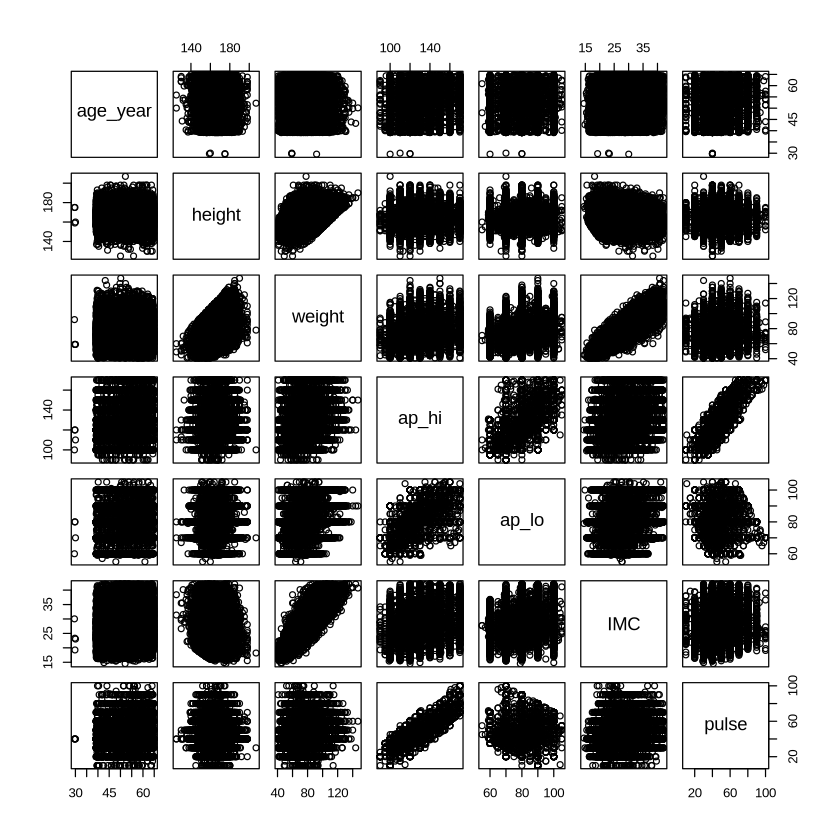

In [57]:
par(bg="white")
pairs(data.clean[,c(1,3,4,5,6,13,14)])

In [58]:
cor(data.clean[,c(1,3,4,5,6,13,14)], method = "p")
cor(data.clean[,c(1,3,4,5,6,13,14)], method = "s")

,age_year,height,weight,ap_hi,ap_lo,IMC,pulse
age_year,1.00000000,-0.091342910,0.05545969,0.207000348,0.15814965,0.1138051,0.16153816
height,-0.09134291,1.000000000,0.37499804,0.007937181,0.02686391,-0.1818877,-0.01042288
weight,0.05545969,0.374998037,1.00000000,0.255960236,0.23776313,0.8390205,0.16602576
ap_hi,0.20700035,0.007937181,0.25596024,1.000000000,0.70760894,0.2674123,0.82543207
ap_lo,0.15814965,0.026863911,0.23776313,0.707608939,1.00000000,0.2370137,0.18520397
IMC,0.11380512,-0.181887676,0.83902050,0.267412277,0.23701366,1.0000000,0.18255128
pulse,0.16153816,-0.010422876,0.16602576,0.825432070,0.18520397,0.1825513,1.00000000


,age_year,height,weight,ap_hi,ap_lo,IMC,pulse
age_year,1.00000000,-0.086774817,0.05789343,0.21735450,0.15371462,0.1088697,0.165586893
height,-0.08677482,1.000000000,0.35356485,0.01751426,0.02591771,-0.1668813,-0.005837029
weight,0.05789343,0.353564852,1.00000000,0.25843297,0.22979621,0.8357962,0.167891005
ap_hi,0.21735450,0.017514260,0.25843297,1.00000000,0.71980293,0.2643269,0.787324713
ap_lo,0.15371462,0.025917711,0.22979621,0.71980293,1.00000000,0.2294010,0.214908833
IMC,0.10886970,-0.166881251,0.83579616,0.26432687,0.22940097,1.0000000,0.180598766
pulse,0.16558689,-0.005837029,0.16789100,0.78732471,0.21490883,0.1805988,1.000000000


Even though we canot see any clear relation we observe that data is no longer trunked by outliers so we can say that our data is clean enough to continue for further analisys.